In [6]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create results folder
results_dir = "../results"
os.makedirs(results_dir, exist_ok=True)


# Load dataset
data = pd.read_csv("../data/weatherHistory.csv")
data = data[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)']]
data = data.dropna()


# Helper function to make safe filenames
def sanitize_filename(name):
    return re.sub(r'[^\w\d-]', '_', name)


# Basic Info & Statistics
print("Shape:", data.shape)
print("\nData types:\n", data.dtypes)
print("\nMissing values:\n", data.isnull().sum())
print("\nFirst 5 rows:\n", data.head())
print("\nStatistical Summary:\n", data.describe())


# Distribution Plots
features = ['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)']

for feature in features:
    plt.figure(figsize=(6,4))
    sns.histplot(data[feature], kde=True, color='skyblue')
    plt.title(f"{feature} Distribution")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.tight_layout()
    
    # Save plot
    safe_name = sanitize_filename(feature)
    plt.savefig(f"{results_dir}/{safe_name}_distribution.png")
    plt.close() 


# Correlation Heatmap
corr = data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.savefig(f"{results_dir}/correlation_heatmap.png")
plt.close()


# Pairplot
sns.pairplot(data, kind='scatter', diag_kind='kde')
plt.suptitle("Pairplot of Features", y=1.02)
plt.savefig(f"{results_dir}/pairplot.png")
plt.close()


# Boxplots
for feature in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=data[feature], color='lightgreen')
    plt.title(f"{feature} Boxplot")
    plt.tight_layout()
    
    safe_name = sanitize_filename(feature)
    plt.savefig(f"{results_dir}/{safe_name}_boxplot.png")
    plt.close()

print(f"✅ All plots saved in '{results_dir}' folder")

Shape: (96453, 4)

Data types:
 Temperature (C)         float64
Humidity                float64
Wind Speed (km/h)       float64
Pressure (millibars)    float64
dtype: object

Missing values:
 Temperature (C)         0
Humidity                0
Wind Speed (km/h)       0
Pressure (millibars)    0
dtype: int64

First 5 rows:
    Temperature (C)  Humidity  Wind Speed (km/h)  Pressure (millibars)
0         9.472222      0.89            14.1197               1015.13
1         9.355556      0.86            14.2646               1015.63
2         9.377778      0.89             3.9284               1015.94
3         8.288889      0.83            14.1036               1016.41
4         8.755556      0.83            11.0446               1016.51

Statistical Summary:
        Temperature (C)      Humidity  Wind Speed (km/h)  Pressure (millibars)
count     96453.000000  96453.000000       96453.000000          96453.000000
mean         11.932678      0.734899          10.810640           1003.23595

Mean Squared Error: 53.925048948568
R² Score: 0.4148711689952155


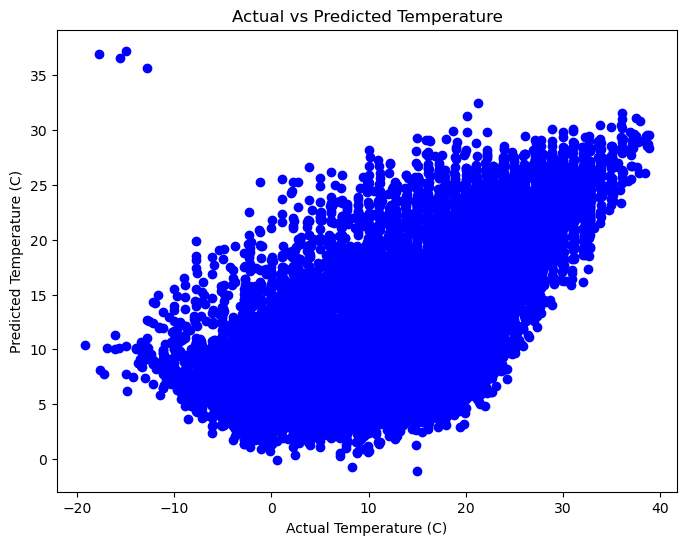

✅ Model saved at ../models/weather_temp_model.pkl


In [7]:
import warnings
warnings.filterwarnings("ignore")

# Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib


# Split Features and Target
X = data[['Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)']]
y = data['Temperature (C)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)


# Evaluate Model
y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Plot actual vs predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Temperature (C)")
plt.ylabel("Predicted Temperature (C)")
plt.title("Actual vs Predicted Temperature")
plt.show()


# Save Model
joblib.dump(model, "../models/weather_temp_model.pkl")
print("✅ Model saved at ../models/weather_temp_model.pkl")